In [1]:
import cv2
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.preprocessing import image
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize
from skimage import data

Using TensorFlow backend.


#### Read the video, extract frames from it and save them as images

In [ ]:
count = 0
videoFile = "Salman Khan Rapid Fire Round.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5)#frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        path ='C:/Users/charanjit/Desktop/Minor Project/images3'
        cv2.imwrite(os.path.join(path , filename), frame)
cap.release()
print ("Done!")

#### Plotting an image extracted from the video.

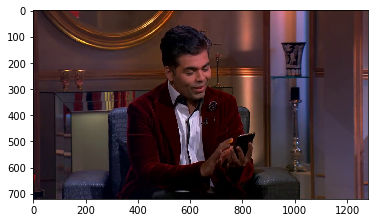

In [2]:
img = plt.imread('C:/Users/charanjit/Desktop/Minor Project/images3/frame25.jpg')   # reading image using its name
plt.imshow(img)

#### Labelling images for training the model

In [4]:
import pandas as pd
Image_ID = []
a=2
for count in range(0,253):
    Image_ID.append("frame%d.jpg" % count)
data = pd.DataFrame({"Image_ID":Image_ID,"Class":a})
data

,Image_ID,Class
0,frame0.jpg,2
1,frame1.jpg,2
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2
5,frame5.jpg,2
6,frame6.jpg,2
7,frame7.jpg,2
8,frame8.jpg,2
9,frame9.jpg,2


In [5]:
arr = [4,5,8,9,17,25,26,28,29,34,39,40,44,45,46,47,48,49,50,53,56,57,59,62,63,71,72,73,74,75,82,83,86,87,88,98,
       99,100,104,105,107,108,113,114,116,122,124,125,126,129,130,132,133,138,141,142,145,146,150,151,154,155,
       158,162,163,168,169,170,173,176,177,180,158,186,189,197,198,202,203,210,218,219,240,241,242,246,250,251,252]
data.Class[arr]=1
zeros =[0,1,2,3,10,11,12,13,20,21,42,43,64,65,66,67,89,90,91,236,237,238,239]
data.Class[zeros]=0
data

c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Image_ID,Class
0,frame0.jpg,0
1,frame1.jpg,0
2,frame2.jpg,0
3,frame3.jpg,0
4,frame4.jpg,1
5,frame5.jpg,1
6,frame6.jpg,2
7,frame7.jpg,2
8,frame8.jpg,1
9,frame9.jpg,1


In [6]:
data.Class.value_counts()

2    142
1     88
0     23
Name: Class, dtype: int64

In [7]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('C:/Users/charanjit/Desktop/Minor Project/images3/' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [8]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [9]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [10]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

#### Building the model

In [12]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [14]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((177, 7, 7, 512), (76, 7, 7, 512))

In [15]:
X_train = X_train.reshape(177, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(76, 7*7*512)

In [16]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [17]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='sigmoid'))    # output layer

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [19]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 177 samples, validate on 76 samples
Epoch 1/100
177/177 [==============================] - 7s 42ms/step - loss: 0.7450 - acc: 0.4237 - val_loss: 0.2955 - val_acc: 0.7368
Epoch 2/100
177/177 [==============================] - 4s 22ms/step - loss: 0.3450 - acc: 0.8983 - val_loss: 0.2454 - val_acc: 0.9737
Epoch 3/100
177/177 [==============================] - 4s 22ms/step - loss: 0.1528 - acc: 0.9831 - val_loss: 0.1762 - val_acc: 0.9737
Epoch 4/100
177/177 [==============================] - 4s 22ms/step - loss: 0.0479 - acc: 0.9944 - val_loss: 0.2669 - val_acc: 0.9737
Epoch 5/100
177/177 [==============================] - 4s 22ms/step - loss: 0.0612 - acc: 0.9944 - val_loss: 0.2966 - val_acc: 0.9737
Epoch 6/100
177/177 [==============================] - 4s 22ms/step - loss: 0.0634 - acc: 0.9944 - val_loss: 0.2924 - val_acc: 0.9737
Epoch 7/100
177/177 [==============================] - 4s 22ms/step - loss: 0.0598 - acc: 0.9944 - val_loss: 0.2808 - val_acc: 0.9737
Epoch 8/100
177/1

### For Test Data

In [ ]:
count = 0
videoFile = "2.5 Probability Density Function and Probability Mass Function.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        path = "C:/Users/charanjit/Desktop/images2"
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(os.path.join(path, filename), frame)
cap.release()
print ("Done!")

In [21]:
IDs = []
for ab in range(253,488):
    IDs.append("frame%d.jpg" % ab)
test = pd.DataFrame({'Image_ID':IDs})

In [22]:
test

,Image_ID
0,frame253.jpg
1,frame254.jpg
2,frame255.jpg
3,frame256.jpg
4,frame257.jpg
5,frame258.jpg
6,frame259.jpg
7,frame260.jpg
8,frame261.jpg
9,frame262.jpg


In [23]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('C:/Users/charanjit/Desktop/Minor Project/test/' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [24]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [25]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

(235, 7, 7, 512)

In [26]:
# converting the images to 1-D form
test_image = test_image.reshape(235, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [27]:
predictions = model.predict_classes(test_image)


In [28]:
print("The screen time of Salman Khan is - ", predictions[predictions==2].shape[0], "seconds and Karan Johar is - ", predictions[predictions==1].shape[0],)

The screen time of Salman Khan is -  120 seconds and Karan Johar is -  84
